In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
cf.go_offline()

import os
import time

from sklearn.decomposition import PCA

# Since pytrends is returning a DataFrame object, we need pandas:
import pandas as pd
import numpy as np
# Import of pytrends (needs to be pip installed first):

import holidays

In [2]:
%%time
path_data = r'C:\Users\patri\Google trends paper\data'
path_data2 = r'D:\Temp\20200612\GEPIII_dataset'
path_figures = r'C:\Users\patri\Google trends paper\figures'

train_df = pd.read_feather(os.path.join(path_data2,'train.feather'))
new_building_meta_df = pd.read_pickle(os.path.join(path_data2,'new_building_meta_df.pickle'))

Wall time: 204 ms


In [3]:
# Remove outliers and missing data

train_df = train_df.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20 18")')
train_df = train_df.query('not (building_id == 681 & meter == 0 & timestamp <= "2016-04-27")')
train_df = train_df.query('not (building_id == 761 & meter == 0 & timestamp <= "2016-09-02")')
train_df = train_df.query('not (building_id == 799 & meter == 0 & timestamp <= "2016-09-02")')
train_df = train_df.query('not (building_id == 802 & meter == 0 & timestamp <= "2016-08-24")')
train_df = train_df.query('not (building_id == 1073 & meter == 0 & timestamp <= "2016-10-26")')
train_df = train_df.query('not (building_id == 1094 & meter == 0 & timestamp <= "2016-09-08")')
train_df = train_df.query('not (building_id == 29 & meter == 0 & timestamp <= "2016-08-10")')
train_df = train_df.query('not (building_id == 40 & meter == 0 & timestamp <= "2016-06-04")')
train_df = train_df.query('not (building_id == 45 & meter == 0 & timestamp <= "2016-07")')
train_df = train_df.query('not (building_id == 106 & meter == 0 & timestamp <= "2016-11")')
train_df = train_df.query('not (building_id == 107 & meter == 0 & timestamp >= "2016-11-10")')
train_df = train_df.query('not (building_id == 112 & meter == 0 & timestamp < "2016-10-31 15")')
train_df = train_df.query('not (building_id == 144 & meter == 0 & timestamp > "2016-05-14" & timestamp < "2016-10-31")')
train_df = train_df.query('not (building_id == 147 & meter == 0 & timestamp > "2016-06-05 19" & timestamp < "2016-07-18 15")')
train_df = train_df.query('not (building_id == 171 & meter == 0 & timestamp <= "2016-07-05")')
train_df = train_df.query('not (building_id == 177 & meter == 0 & timestamp > "2016-06-04" & timestamp < "2016-06-25")')
train_df = train_df.query('not (building_id == 258 & meter == 0 & timestamp > "2016-09-26" & timestamp < "2016-12-12")')
train_df = train_df.query('not (building_id == 258 & meter == 0 & timestamp > "2016-08-30" & timestamp < "2016-09-08")')
train_df = train_df.query('not (building_id == 258 & meter == 0 & timestamp > "2016-09-18" & timestamp < "2016-09-25")')
train_df = train_df.query('not (building_id == 260 & meter == 0 & timestamp <= "2016-05-11")')
train_df = train_df.query('not (building_id == 269 & meter == 0 & timestamp > "2016-06-04" & timestamp < "2016-06-25")')
train_df = train_df.query('not (building_id == 304 & meter == 0 & timestamp >= "2016-11-20")')
train_df = train_df.query('not (building_id == 545 & meter == 0 & timestamp > "2016-01-17" & timestamp < "2016-02-10")')
train_df = train_df.query('not (building_id == 604 & meter == 0 & timestamp < "2016-11-21")')
train_df = train_df.query('not (building_id == 693 & meter == 0 & timestamp > "2016-09-07" & timestamp < "2016-11-23")')
train_df = train_df.query('not (building_id == 693 & meter == 0 & timestamp > "2016-07-12" & timestamp < "2016-05-29")')
train_df = train_df.query('not (building_id == 723 & meter == 0 & timestamp > "2016-10-06" & timestamp < "2016-11-22")')
train_df = train_df.query('not (building_id == 733 & meter == 0 & timestamp > "2016-05-29" & timestamp < "2016-06-22")')
train_df = train_df.query('not (building_id == 733 & meter == 0 & timestamp > "2016-05-19" & timestamp < "2016-05-20")')
train_df = train_df.query('not (building_id == 803 & meter == 0 & timestamp > "2016-9-25")')
train_df = train_df.query('not (building_id == 815 & meter == 0 & timestamp > "2016-05-17" & timestamp < "2016-11-17")')
train_df = train_df.query('not (building_id == 848 & meter == 0 & timestamp > "2016-01-15" & timestamp < "2016-03-20")')
train_df = train_df.query('not (building_id == 857 & meter == 0 & timestamp > "2016-04-13")')
train_df = train_df.query('not (building_id == 909 & meter == 0 & timestamp < "2016-02-02")')
train_df = train_df.query('not (building_id == 909 & meter == 0 & timestamp < "2016-06-23")')
train_df = train_df.query('not (building_id == 1008 & meter == 0 & timestamp > "2016-10-30" & timestamp < "2016-11-21")')
train_df = train_df.query('not (building_id == 1113 & meter == 0 & timestamp < "2016-07-27")')
train_df = train_df.query('not (building_id == 1153 & meter == 0 & timestamp < "2016-01-20")')
train_df = train_df.query('not (building_id == 1169 & meter == 0 & timestamp < "2016-08-03")')
train_df = train_df.query('not (building_id == 1170 & meter == 0 & timestamp > "2016-06-30" & timestamp < "2016-07-05")')
train_df = train_df.query('not (building_id == 1221 & meter == 0 & timestamp < "2016-11-04")')
train_df = train_df.query('not (building_id == 1225 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1234 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1233 & building_id <= 1234 & meter == 0 & timestamp > "2016-01-13 22" & timestamp < "2016-03-08 12")')
train_df = train_df.query('not (building_id == 1241 & meter == 0 & timestamp > "2016-07-14" & timestamp < "2016-11-19")')
train_df = train_df.query('not (building_id == 1250 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1255 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1264 & meter == 0 & timestamp > "2016-08-23")')
train_df = train_df.query('not (building_id == 1265 & meter == 0 & timestamp > "2016-05-06" & timestamp < "2016-05-26")')
train_df = train_df.query('not (building_id == 1272 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1275 & building_id <= 1280 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1283 & meter == 0 & timestamp > "2016-07-08" & timestamp < "2016-08-03")')
train_df = train_df.query('not (building_id >= 1291 & building_id <= 1302 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1303 & meter == 0 & timestamp > "2016-07-25 22" & timestamp < "2016-07-27 16")')
train_df = train_df.query('not (building_id == 1303 & meter == 0 & timestamp > "2016-01-26" & timestamp < "2016-06-02 12")')
train_df = train_df.query('not (building_id == 1319 & meter == 0 & timestamp > "2016-05-17 16" & timestamp < "2016-06-07 12")')
train_df = train_df.query('not (building_id == 1319 & meter == 0 & timestamp > "2016-08-18 14" & timestamp < "2016-09-02 14")')
train_df = train_df.query('not (building_id == 1322 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')

# 2nd cleaning
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
train_df = train_df.query('not (building_id == 1272 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1291 & building_id <= 1297 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1300 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1302 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1291 & building_id <= 1299 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1221 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1225 & building_id <= 1226 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1233 & building_id <= 1234 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1241 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1223 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1226 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1233 & building_id <= 1234 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1225 & building_id <= 1226 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1305 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1307 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1223 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1231 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1233 & building_id <= 1234 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1272 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id >= 1275 & building_id <= 1297 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1300 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1302 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1293 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-25 12")')
train_df = train_df.query('not (building_id == 1302 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-25 12")')
train_df = train_df.query('not (building_id == 1223 & meter == 0 & timestamp > "2016-9-28 07" & timestamp < "2016-10-11 18")')
train_df = train_df.query('not (building_id == 1225 & meter == 1 & timestamp > "2016-8-22 23" & timestamp < "2016-10-11 14")')
train_df = train_df.query('not (building_id == 1230 & meter == 1 & timestamp > "2016-8-22 08" & timestamp < "2016-10-05 18")')
train_df = train_df.query('not (building_id == 904 & meter == 0 & timestamp < "2016-02-17 08")')
train_df = train_df.query('not (building_id == 986 & meter == 0 & timestamp < "2016-02-17 08")')
train_df = train_df.query('not (building_id == 954 & meter == 0 & timestamp < "2016-08-08 11")')
train_df = train_df.query('not (building_id == 954 & meter == 0 & timestamp < "2016-06-23 08")')
train_df = train_df.query('not (building_id >= 745 & building_id <= 770 & meter == 1 & timestamp > "2016-10-05 01" & timestamp < "2016-10-10 09")')
train_df = train_df.query('not (building_id >= 774 & building_id <= 787 & meter == 1 & timestamp > "2016-10-05 01" & timestamp < "2016-10-10 09")')

# 3rd cleaning hourly spikes
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')

train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp == "2016-02-26 01")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp == "2016-02-26 01")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp == "2016-02-26 01")')

train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')

train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')
train_df = train_df.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')

train_df = train_df.query('not (building_id != 1227 & building_id != 1281 & building_id != 1314 & building_id >=1223 & building_id < 1335 & meter==0 & meter_reading==0)')

# 4th cleaning (some using hindsight from leaks)
train_df = train_df.query('not (building_id >= 1223 & building_id <= 1324 & meter==1 & timestamp > "2016-07-16 04" & timestamp < "2016-07-19 11")')
train_df = train_df.query('not (building_id == 107 & meter == 0 & timestamp <= "2016-07-06")')
train_df = train_df.query('not (building_id == 180 & timestamp >= "2016-02-17 12")')
#train_df = train_df.query('not (building_id == 182 & meter == 0)')
train_df = train_df.query('not (building_id == 191 & meter == 0 & timestamp >= "2016-12-22 09")')
train_df = train_df.query('not (building_id == 192 & meter == 1 & timestamp >= "2016-05-09 18")')
train_df = train_df.query('not (building_id == 192 & meter == 3 & timestamp >= "2016-03-29 05" & timestamp <= "2016-04-04 08")')
train_df = train_df.query('not (building_id == 207 & meter == 1 & timestamp > "2016-07-02 20" & timestamp < "2016-08-25 12")')
train_df = train_df.query('not (building_id == 258 & timestamp > "2016-09-18" & timestamp < "2016-12-12 13")')
train_df = train_df.query('not (building_id == 258 & timestamp > "2016-08-29 08" & timestamp < "2016-09-08 14")')
train_df = train_df.query('not (building_id == 257 & meter == 1 & timestamp < "2016-03-25 16")')
train_df = train_df.query('not (building_id == 260 & meter == 1 & timestamp > "2016-05-10 17" & timestamp < "2016-08-17 11")')
train_df = train_df.query('not (building_id == 260 & meter == 1 & timestamp > "2016-08-28 01" & timestamp < "2016-10-31 13")')
train_df = train_df.query('not (building_id == 220 & meter == 1 & timestamp > "2016-09-23 01" & timestamp < "2016-09-23 12")')
train_df = train_df.query('not (building_id == 281 & meter == 1 & timestamp > "2016-10-25 08" & timestamp < "2016-11-04 15")')
train_df = train_df.query('not (building_id == 273 & meter == 1 & timestamp > "2016-04-03 04" & timestamp < "2016-04-29 15")')
train_df = train_df.query('not (building_id == 28 & meter == 0 & timestamp < "2016-10-14 20")')
train_df = train_df.query('not (building_id == 71 & meter == 0 & timestamp < "2016-08-18 20")')
train_df = train_df.query('not (building_id == 76 & meter == 0 & timestamp > "2016-06-04 09" & timestamp < "2016-06-04 14")')
train_df = train_df.query('not (building_id == 101 & meter == 0 & timestamp > "2016-10-12 13" & timestamp < "2016-10-12 18")')
train_df = train_df.query('not (building_id == 7 & meter == 1 & timestamp > "2016-11-03 09" & timestamp < "2016-11-28 14")')
train_df = train_df.query('not (building_id == 9 & meter == 1 & timestamp > "2016-12-06 08")')
train_df = train_df.query('not (building_id == 43 & meter == 1 & timestamp > "2016-04-03 08" & timestamp < "2016-06-06 13")')
train_df = train_df.query('not (building_id == 60 & meter == 1 & timestamp > "2016-05-01 17" & timestamp < "2016-05-01 21")')
train_df = train_df.query('not (building_id == 75 & meter == 1 & timestamp > "2016-08-05 13" & timestamp < "2016-08-26 12")')
train_df = train_df.query('not (building_id == 95 & meter == 1 & timestamp > "2016-08-08 10" & timestamp < "2016-08-26 13")')
train_df = train_df.query('not (building_id == 97 & meter == 1 & timestamp > "2016-08-08 14" & timestamp < "2016-08-25 14")')
train_df = train_df.query('not (building_id == 1232 & meter == 1 & timestamp > "2016-06-23 16" & timestamp < "2016-08-31 20")')
train_df = train_df.query('not (building_id == 1236 & meter == 1 & meter_reading >= 3000)')
train_df = train_df.query('not (building_id == 1239 & meter == 1 & timestamp > "2016-03-11 16" & timestamp < "2016-03-27 17")')
train_df = train_df.query('not (building_id == 1264 & meter == 1 & timestamp > "2016-08-22 17" & timestamp < "2016-09-22 20")')
train_df = train_df.query('not (building_id == 1264 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
train_df = train_df.query('not (building_id == 1269 & meter == 1 & meter_reading >= 2000)')
train_df = train_df.query('not (building_id == 1272 & meter == 1 & timestamp > "2016-08-11 12" & timestamp < "2016-08-30 19")')
train_df = train_df.query('not (building_id == 1273 & meter == 1 & timestamp > "2016-05-31 14" & timestamp < "2016-06-17")')
train_df = train_df.query('not (building_id == 1276 & meter == 1 & timestamp < "2016-02-03 23")')
train_df = train_df.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-05-18" & timestamp < "2016-05-26 09")')
train_df = train_df.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-02-28 23" & timestamp < "2016-05-02 05")')
train_df = train_df.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-06-12 01" & timestamp < "2016-7-07 06")')
train_df = train_df.query('not (building_id == 1288 & meter == 1 & timestamp > "2016-07-07 15" & timestamp < "2016-08-12 17")')
train_df = train_df.query('not (building_id == 1311 & meter == 1 & timestamp > "2016-04-25 18" & timestamp < "2016-05-13 14")')
#train_df = train_df.query('not (building_id == 1099 & meter == 2)')

train_df = train_df.query('not (building_id == 1329 & meter == 0 & timestamp > "2016-04-28 00" & timestamp < "2016-04-28 07")')
train_df = train_df.query('not (building_id == 1331 & meter == 0 & timestamp > "2016-04-28 00" & timestamp < "2016-04-28 07")')
train_df = train_df.query('not (building_id == 1427 & meter == 0 & timestamp > "2016-04-11 10" & timestamp < "2016-04-11 14")')
train_df = train_df.query('not (building_id == 1426 & meter == 2 & timestamp > "2016-05-03 09" & timestamp < "2016-05-03 14")')
#train_df = train_df.query('not (building_id == 1345 & meter == 0 & timestamp < "2016-03-01")')
train_df = train_df.query('not (building_id == 1346 & timestamp < "2016-03-01")')
train_df = train_df.query('not (building_id == 1359 & meter == 0 & timestamp > "2016-04-25 17" & timestamp < "2016-07-22 14")')
train_df = train_df.query('not (building_id == 1365 & meter == 0 & timestamp > "2016-08-19 00" & timestamp < "2016-08-19 07")')
train_df = train_df.query('not (building_id == 1365 & meter == 0 & timestamp > "2016-06-18 22" & timestamp < "2016-06-19 06")')

train_df = train_df.query('not (building_id == 18 & meter == 0 & timestamp > "2016-06-04 09" & timestamp < "2016-06-04 16")')
train_df = train_df.query('not (building_id == 18 & meter == 0 & timestamp > "2016-11-05 05" & timestamp < "2016-11-05 15")')
train_df = train_df.query('not (building_id == 101 & meter == 0 & meter_reading > 800)')

train_df = train_df.query('not (building_id == 1384 & meter == 0 & meter_reading == 0 )')
train_df = train_df.query('not (building_id >= 1289 & building_id <= 1301 & meter == 2 & meter_reading == 0)')
train_df = train_df.query('not (building_id == 1243 & meter == 2 & meter_reading == 0)')
train_df = train_df.query('not (building_id == 1263 & meter == 2 & meter_reading == 0)')
train_df = train_df.query('not (building_id == 1284 & meter == 2 & meter_reading == 0)')
train_df = train_df.query('not (building_id == 1286 & meter == 2 & meter_reading == 0)')
train_df = train_df.query('not (building_id == 1263 & meter == 0 & timestamp > "2016-11-10 11" & timestamp < "2016-11-10 15")')

train_df = train_df.query('not (building_id == 1238 & meter == 2 & meter_reading == 0)')
train_df = train_df.query('not (building_id == 1329 & meter == 2 & timestamp > "2016-11-21 12" & timestamp < "2016-11-29 12")')
train_df = train_df.query('not (building_id == 1249 & meter == 2 & meter_reading == 0)')

train_df = train_df.query('not (building_id == 1250 & meter == 2 & meter_reading == 0)')
train_df = train_df.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-03-05 18" & timestamp < "2016-03-05 22")')
train_df = train_df.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-03-27 00" & timestamp < "2016-03-27 23")')
train_df = train_df.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-04-11 09" & timestamp < "2016-04-13 03")')
train_df = train_df.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-04-29 00" & timestamp < "2016-04-30 15")')
train_df = train_df.query('not (building_id == 1303 & meter == 2 & timestamp < "2016-06-06 19")')
train_df = train_df.query('not (building_id >= 1223 & building_id <= 1324 & meter == 1 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')
train_df = train_df.query('not (building_id >= 1223 & building_id <= 1324 & building_id != 1296 & building_id != 129 & building_id != 1298 & building_id != 1299 & meter == 2 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')
train_df = train_df.query('not (building_id >= 1223 & building_id <= 1324 & meter == 3 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')

In [4]:
train_df = train_df.merge(new_building_meta_df.drop('site_id',axis=1), on=['building_id','meter'])
train_df_pivot = train_df.pivot_table(index='timestamp', columns='merged_id', values='meter_reading')

In [5]:
# Load Google trends data

df_googleTrend_topic = pd.read_csv(os.path.join(path_data, 'google-trends-data_2016-2018.csv'))
df_googleTrend_topic['date'] = pd.to_datetime(df_googleTrend_topic['date'])

df_googleTrend_topic

,date,value,geo_id,title,type,category,year
0,2016-01-01,-1.217505,CA,Education,Topic,Education,2016
1,2016-01-02,-0.706301,CA,Education,Topic,Education,2016
2,2016-01-03,-0.933503,CA,Education,Topic,Education,2016
3,2016-01-04,0.884113,CA,Education,Topic,Education,2016
4,2016-01-05,1.111315,CA,Education,Topic,Education,2016
...,...,...,...,...,...,...,...
150147,2018-12-27,-1.540685,US,Secondary school,School category,School,2018
150148,2018-12-28,-1.480177,US,Secondary school,School category,School,2018
150149,2018-12-29,-1.480177,US,Secondary school,School category,School,2018
150150,2018-12-30,-1.601193,US,Secondary school,School category,School,2018


In [6]:
# Pivot table of Google trends data

df_googleTrend_topic_pivot = df_googleTrend_topic.pivot_table(columns=['geo_id', 'title'], index='date', values='value')
df_googleTrend_topic_pivot.columns = ['_'.join(col) for col in df_googleTrend_topic_pivot.columns.values]  

df_googleTrend_topic_pivot

,CA_Career,CA_Company,CA_Education,CA_Employment,CA_Enterprise,CA_Google,CA_Google Classroom,CA_Google Docs,CA_Google Drive,CA_Health Care,...,US_Residential building,US_Retail,US_School,US_School district,US_Science,US_Secondary school,US_Technology,US_Utility,US_Warehouse,US_storage
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,-1.635555,-2.008469,-1.217505,-1.837416,-2.231244,-1.032120,-0.983800,-1.189434,-1.568648,-2.240937,...,-0.292297,0.654998,-1.750026,-1.547037,-1.329856,-1.832001,-1.958945,-1.128340,-1.529983,0.110304
2016-01-02,-0.952458,-1.698173,-0.706301,-1.376364,-1.427049,-1.226411,-1.069090,-1.040070,-1.530427,-1.876429,...,0.204794,0.046342,-1.390452,-1.163072,-0.846961,-1.290387,-1.904873,-1.183383,-0.650718,0.110304
2016-01-03,-0.742274,-1.387876,-0.933503,-1.427592,-1.082394,-0.934975,-1.005123,-0.950451,-1.262879,-1.720212,...,-0.982702,-0.105821,-0.671303,-0.267155,-0.653803,-0.957086,-1.201942,-0.715512,-0.776327,-0.440632
2016-01-04,1.044287,0.598023,0.884113,1.543633,0.870653,0.425062,-0.002964,-0.263374,0.571738,0.258541,...,0.812350,-0.277006,1.606002,3.636483,0.505145,0.709419,0.203919,-0.522859,0.354156,-0.091706
2016-01-05,1.727384,0.846261,1.111315,1.338721,0.353670,0.425062,-0.024287,-0.024391,0.265968,0.779266,...,-0.457994,-0.238965,1.066640,1.908643,1.084619,0.584431,0.852778,-0.687990,0.647245,0.183762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,-1.526182,-1.075367,-2.029616,-0.868462,-0.681326,-0.924365,-1.176509,-1.367003,-1.508994,-0.683589,...,-0.400707,0.501025,-1.518794,-1.267057,-1.325727,-1.540685,-1.398096,-0.369226,0.046987,-0.379441
2018-12-28,-1.107919,-1.144634,-1.263800,-1.199711,-1.549118,-1.136270,-1.242832,-1.475921,-1.728408,-0.366769,...,-0.464029,0.309517,-1.518794,-1.171700,-1.427309,-1.480177,-0.900569,-0.077350,-0.119971,-0.441652
2018-12-29,-1.526182,-1.421704,-1.911798,-1.807002,-2.016391,-1.348175,-1.209671,-1.330697,-1.596759,-2.204327,...,1.245679,0.501025,-1.674424,-1.457769,-1.478100,-1.480177,-1.674500,-1.069727,-1.873031,2.109010


In [7]:
# Calculate correlation (R2) between energy and google-trends topics

df_corr_idxmax_merged = pd.DataFrame()
df_corr_merged = pd.DataFrame()
df_pca_merged = pd.DataFrame()

for site_id, country in zip([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                                   ['US','GB','US','US','US','GB','US','CA','US','US','US','CA','IE','US','US','US']):
    print('site_id: '+str(site_id))
    print('country: '+str(country))    
    
    df_googleTrend_topic_temp = df_googleTrend_topic.loc[df_googleTrend_topic['geo_id'].isin([country])].copy()
    df_googleTrend_topic_temp = df_googleTrend_topic_temp.pivot_table(columns=['geo_id', 'title'], index='date', values='value')
    df_googleTrend_topic_temp.columns = ['_'.join(col) for col in df_googleTrend_topic_temp.columns.values]    
    
    list_powerMeter = train_df_pivot.columns[train_df_pivot.columns.str.contains('site'+str(site_id)+'_')]

    df_pca = train_df_pivot[list_powerMeter].resample('D').mean().copy()
    df_pca.loc[:, :] = np.nan

    for name_powerMeter in list_powerMeter:   

        df_plot = train_df_pivot[[name_powerMeter]].copy()
        df_plot = (df_plot - df_plot.mean()) / df_plot.std()

        df_plot['datetime_date'] = df_plot.index.date
        df_plot['datetime_hour'] = df_plot.index.hour
        df_plot = df_plot.pivot_table(index='datetime_date', columns='datetime_hour', values=name_powerMeter)
        df_plot = df_plot.sort_index()
        df_plot = df_plot.select_dtypes(exclude=['object', 'boolean'])

        df_plot = df_plot[df_plot.std(axis=1)>0]        
        
        pca = PCA(n_components=1)
        pca.fit(df_plot.fillna(0))

        df_temp = pd.DataFrame(pca.transform(df_plot.fillna(0)))
        df_temp.columns = 'PCA_' + df_temp.columns.astype('str')
        df_temp.index = df_plot.index
        df_temp.columns = [name_powerMeter]
       
        df_mean = train_df_pivot.loc['2016', [name_powerMeter]].resample('D').mean()
        if df_temp.merge(df_mean, left_index=True, right_index=True).corr().iloc[0,1]<0:        
            df_temp = -df_temp
            
        df_pca.loc[df_temp.index, name_powerMeter] = df_temp[name_powerMeter]

    df_corr = df_pca.merge(df_googleTrend_topic_temp, left_index=True, right_index=True)
    df_corr = df_corr.corr().loc[df_googleTrend_topic_temp.columns, train_df_pivot[list_powerMeter].columns]
    df_corr = df_corr.reset_index().melt(id_vars='index', value_name='corr')
    df_corr_abs = df_corr.copy()
    df_corr_abs['corr'] = df_corr_abs['corr'].abs()
    df_corr_idxmax = df_corr.loc[df_corr.groupby(['merged_id']).idxmax()['corr'].dropna()]

    df_corr_idxmax['corr_abs'] = df_corr_idxmax['corr'].abs()

    df_corr_merged = pd.concat([df_corr_merged, df_corr], axis=0)    
    df_corr_idxmax_merged = pd.concat([df_corr_idxmax_merged, df_corr_idxmax], axis=0)    
    df_pca_merged = pd.concat([df_pca_merged, df_pca], axis=1)        
    
    print('------------------------------------------------------------------------------------------------------')

site_id: 0
country: US
------------------------------------------------------------------------------------------------------
site_id: 1
country: GB
------------------------------------------------------------------------------------------------------
site_id: 2
country: US
------------------------------------------------------------------------------------------------------
site_id: 3
country: US
------------------------------------------------------------------------------------------------------
site_id: 4
country: US
------------------------------------------------------------------------------------------------------
site_id: 5
country: GB
------------------------------------------------------------------------------------------------------
site_id: 6
country: US
------------------------------------------------------------------------------------------------------
site_id: 7
country: CA
-----------------------------------------------------------------------------------------------

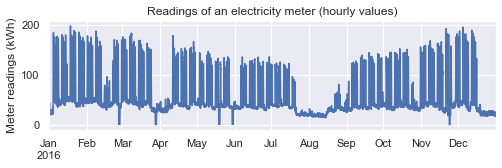

In [8]:
# Create figure

train_df_pivot['site5_bldg721_meter0'].plot(figsize=(8,2), legend=False,ylabel='Meter readings (kWh)',xlabel='',title='Readings of an electricity meter (hourly values)')
plt.savefig(os.path.join(path_figures, 'Preprocess meter readings-1.jpg'), bbox_inches='tight', dpi=300)

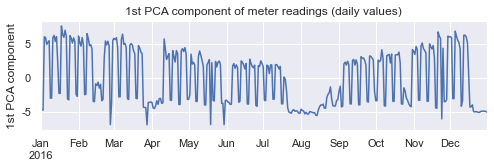

In [9]:
# Create figure

df_pca_merged['site5_bldg721_meter0'].plot(figsize=(8,2), legend=False,ylabel='1st PCA component',xlabel='',title='1st PCA component of meter readings (daily values)')
plt.savefig(os.path.join(path_figures, 'Preprocess meter readings-2.jpg'), bbox_inches='tight', dpi=300)

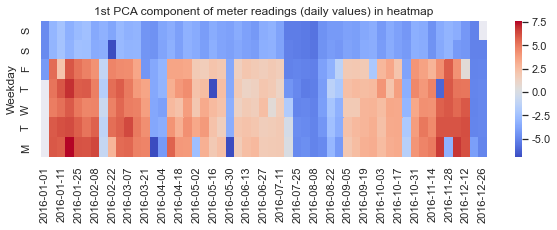

In [10]:
# Create figure

name_meter = 'site5_bldg721_meter0'

df_plot = df_pca_merged[[name_meter]]
df_plot['Week'] = df_plot.index.isocalendar().week
df_plot['Weekday'] = df_plot.index.weekday

for week in df_plot['Week'].unique():
    df_plot.loc[df_plot['Week']==week, 'Week_date'] = df_plot.loc[df_plot['Week']==week].index[0].strftime('%Y-%m-%d')

df_plot = df_plot.pivot_table(columns='Week_date',index='Weekday',values=name_meter)
df_plot = df_plot.sort_index(ascending=False)
df_plot.index = ['S', 'S', 'F', 'T', 'W', 'T', 'M']

plt.figure(figsize=(10,2.5))
sns.heatmap(df_plot, cmap="coolwarm")

plt.xlabel('')
plt.ylabel('Weekday')
plt.title('1st PCA component of meter readings (daily values) in heatmap')

plt.savefig(os.path.join(path_figures, 'Preprocess meter readings-3.jpg'), bbox_inches='tight', dpi=300)

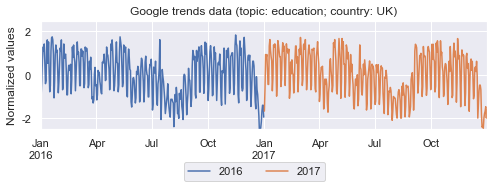

In [11]:
# Create figure

df_plot = df_googleTrend_topic[(df_googleTrend_topic['geo_id']=='GB')&(df_googleTrend_topic['title']=='Education')]
df_plot = df_plot.pivot_table(index='date', columns='year', values='value')
df_plot.loc[:'2017', [2016, 2017]].plot(figsize=(8,2),ylim=(-2.5,2.5),xlabel='',ylabel='Normalized values',title='Google trends data (topic: education; country: UK)')
plt.legend(bbox_to_anchor=(0.65, -0.25), ncol=2)

plt.savefig(os.path.join(path_figures, 'Downloaded Google trends data-1.jpg'), bbox_inches='tight', dpi=300)

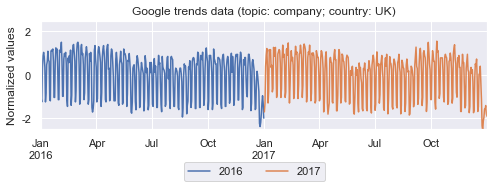

In [12]:
# Create figure

df_plot = df_googleTrend_topic[(df_googleTrend_topic['geo_id']=='GB')&(df_googleTrend_topic['title']=='Company')]
df_plot = df_plot.pivot_table(index='date', columns='year', values='value')
df_plot.loc[:'2017', [2016, 2017]].plot(figsize=(8,2),ylim=(-2.5,2.5),xlabel='',ylabel='Normalized values',title='Google trends data (topic: company; country: UK)')
plt.legend(bbox_to_anchor=(0.65, -0.25), ncol=2)

plt.savefig(os.path.join(path_figures, 'Downloaded Google trends data-2.jpg'), bbox_inches='tight', dpi=300)

name meter: site13_bldg1142_meter0
corr(R-squared): 0.961
topics: US_Microsoft Excel
primary use: Office


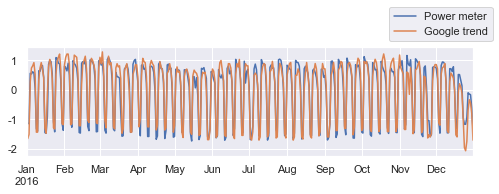

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1136_meter0
corr(R-squared): 0.957
topics: US_Microsoft Outlook
primary use: Office


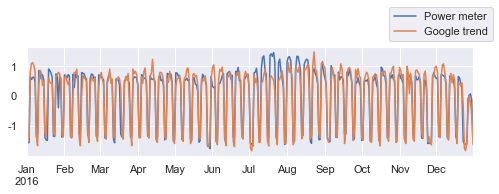

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1133_meter0
corr(R-squared): 0.956
topics: US_Microsoft Outlook
primary use: Office


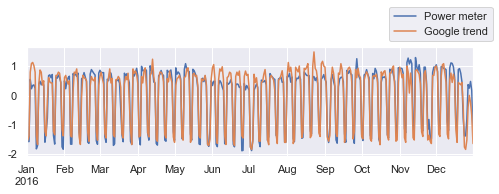

----------------------------------------------------------------------------------------------------
name meter: site4_bldg643_meter0
corr(R-squared): 0.955
topics: US_Microsoft Outlook
primary use: Education


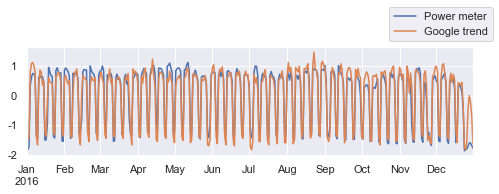

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1193_meter0
corr(R-squared): 0.955
topics: US_Microsoft Excel
primary use: Office


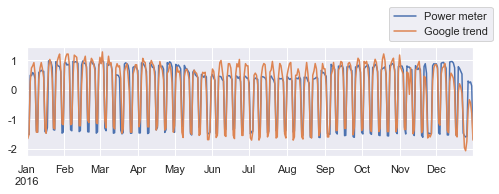

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1364_meter0
corr(R-squared): 0.954
topics: US_Microsoft Outlook
primary use: Utility


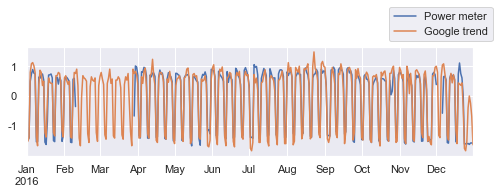

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1206_meter0
corr(R-squared): 0.953
topics: US_Microsoft Excel
primary use: Office


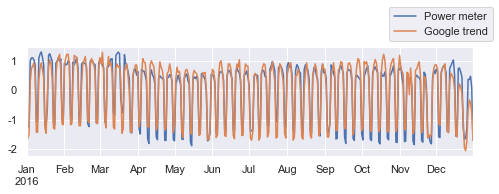

----------------------------------------------------------------------------------------------------
name meter: site4_bldg652_meter0
corr(R-squared): 0.952
topics: US_Microsoft Excel
primary use: Education


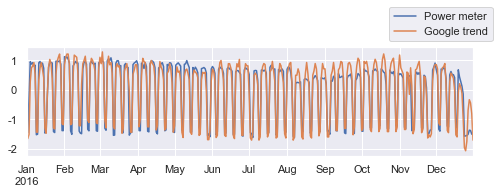

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1148_meter0
corr(R-squared): 0.95
topics: US_Microsoft Outlook
primary use: Office


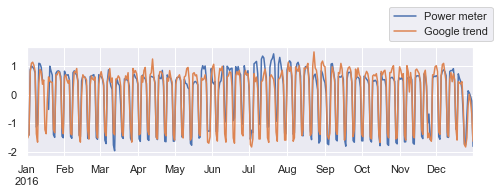

----------------------------------------------------------------------------------------------------
name meter: site4_bldg629_meter0
corr(R-squared): 0.944
topics: US_Microsoft Excel
primary use: Education


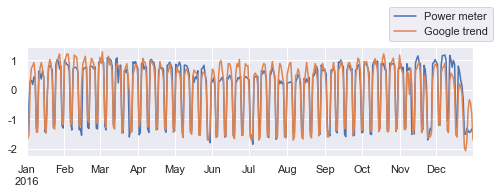

----------------------------------------------------------------------------------------------------
name meter: site9_bldg956_meter0
corr(R-squared): 0.943
topics: US_Microsoft Excel
primary use: Office


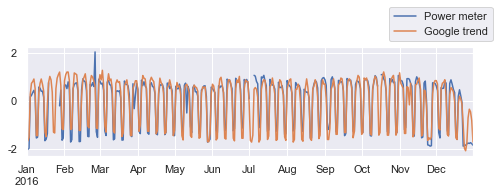

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1341_meter0
corr(R-squared): 0.937
topics: US_Microsoft Outlook
primary use: Education


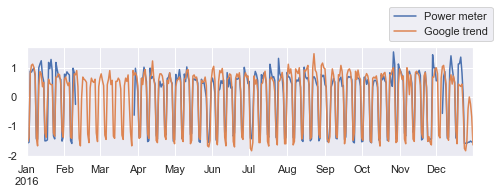

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1098_meter0
corr(R-squared): 0.937
topics: US_Microsoft Outlook
primary use: Office


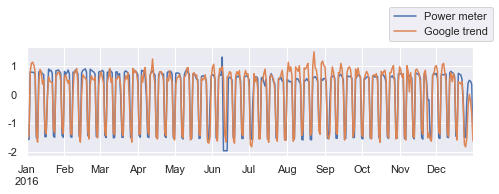

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1366_meter0
corr(R-squared): 0.936
topics: US_Microsoft Outlook
primary use: Office


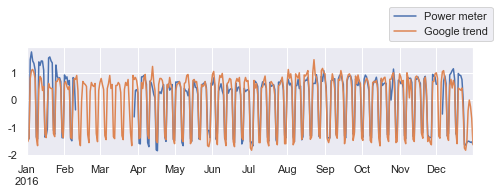

----------------------------------------------------------------------------------------------------
name meter: site2_bldg265_meter0
corr(R-squared): 0.934
topics: US_Microsoft Outlook
primary use: Office


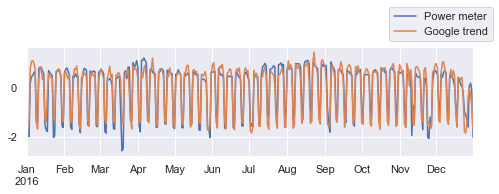

----------------------------------------------------------------------------------------------------
name meter: site4_bldg598_meter0
corr(R-squared): 0.934
topics: US_Microsoft Excel
primary use: Public services


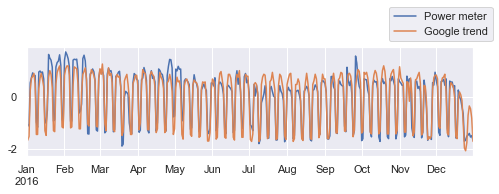

----------------------------------------------------------------------------------------------------
name meter: site4_bldg622_meter0
corr(R-squared): 0.932
topics: US_Microsoft Excel
primary use: Education


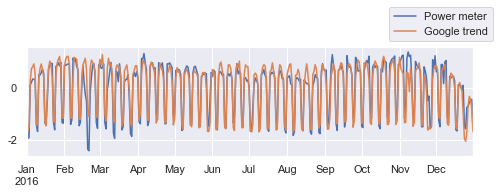

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1211_meter0
corr(R-squared): 0.932
topics: US_Microsoft Excel
primary use: Office


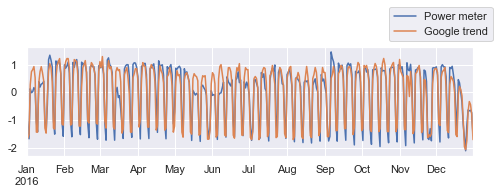

----------------------------------------------------------------------------------------------------
name meter: site4_bldg588_meter0
corr(R-squared): 0.93
topics: US_Microsoft Outlook
primary use: Education


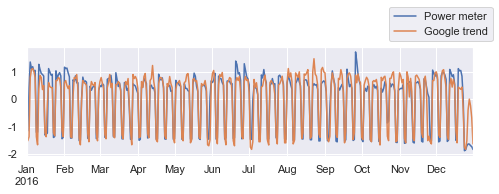

----------------------------------------------------------------------------------------------------
name meter: site4_bldg623_meter0
corr(R-squared): 0.929
topics: US_Microsoft Excel
primary use: Education


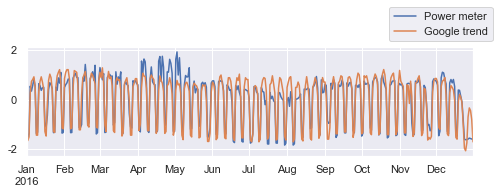

----------------------------------------------------------------------------------------------------
name meter: site4_bldg584_meter0
corr(R-squared): 0.928
topics: US_Microsoft Excel
primary use: Education


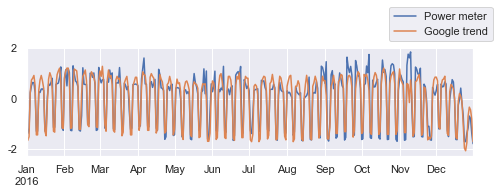

----------------------------------------------------------------------------------------------------
name meter: site14_bldg1300_meter0
corr(R-squared): 0.927
topics: US_Microsoft Outlook
primary use: Healthcare


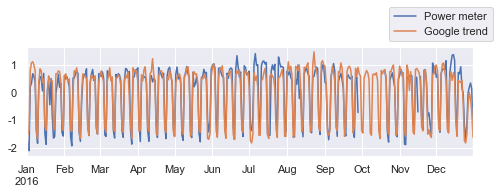

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1209_meter0
corr(R-squared): 0.927
topics: US_Microsoft Excel
primary use: Healthcare


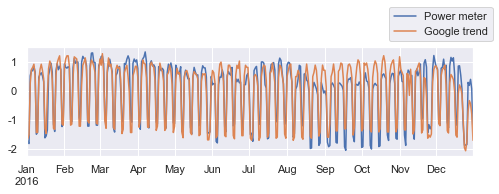

----------------------------------------------------------------------------------------------------
name meter: site2_bldg244_meter0
corr(R-squared): 0.923
topics: US_Microsoft Outlook
primary use: Education


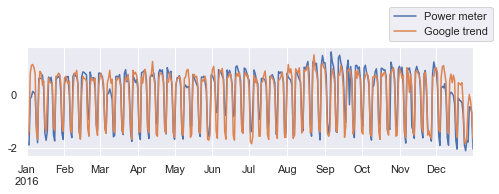

----------------------------------------------------------------------------------------------------
name meter: site5_bldg660_meter0
corr(R-squared): 0.923
topics: GB_Microsoft Excel
primary use: Entertainment/public assembly


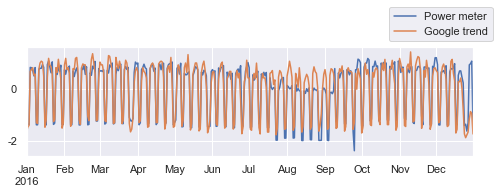

----------------------------------------------------------------------------------------------------
name meter: site4_bldg632_meter0
corr(R-squared): 0.922
topics: US_Microsoft Excel
primary use: Education


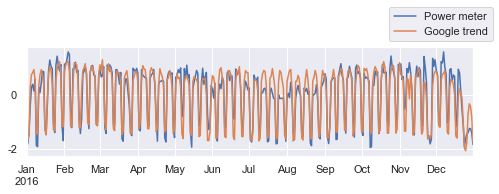

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1074_meter0
corr(R-squared): 0.921
topics: US_Microsoft Excel
primary use: Office


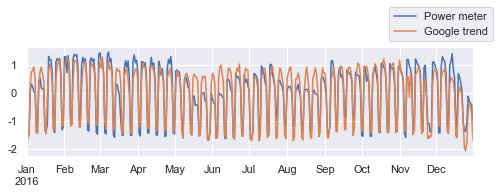

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1210_meter0
corr(R-squared): 0.921
topics: US_Microsoft Outlook
primary use: Office


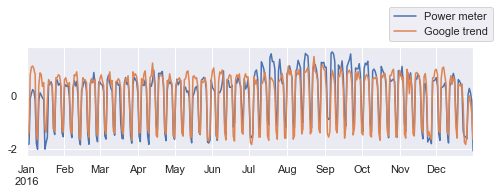

----------------------------------------------------------------------------------------------------
name meter: site9_bldg882_meter0
corr(R-squared): 0.921
topics: US_Education
primary use: Education


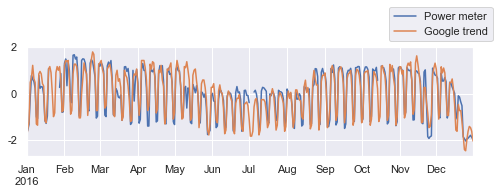

----------------------------------------------------------------------------------------------------
name meter: site9_bldg978_meter0
corr(R-squared): 0.92
topics: US_Microsoft Office
primary use: Education


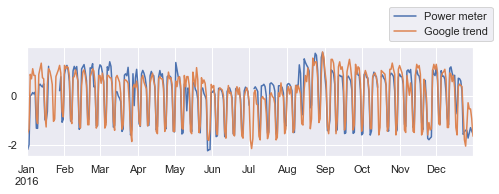

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1207_meter0
corr(R-squared): 0.919
topics: US_Microsoft Outlook
primary use: Healthcare


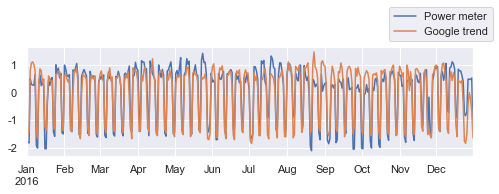

----------------------------------------------------------------------------------------------------
name meter: site9_bldg919_meter0
corr(R-squared): 0.919
topics: US_Microsoft Excel
primary use: Education


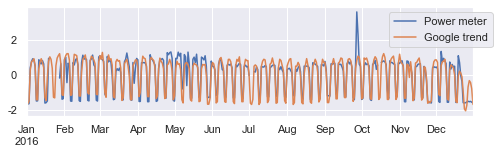

----------------------------------------------------------------------------------------------------
name meter: site4_bldg646_meter0
corr(R-squared): 0.918
topics: US_Office 365
primary use: Education


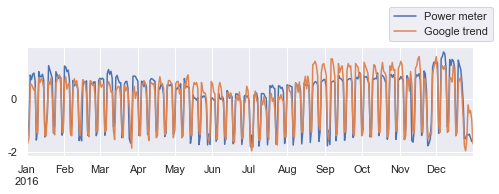

----------------------------------------------------------------------------------------------------
name meter: site14_bldg1289_meter0
corr(R-squared): 0.918
topics: US_Microsoft Outlook
primary use: Education


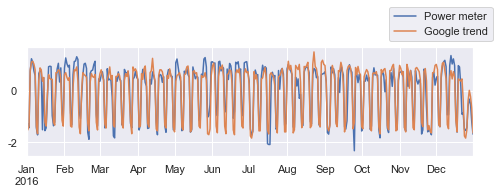

----------------------------------------------------------------------------------------------------
name meter: site4_bldg650_meter0
corr(R-squared): 0.916
topics: US_Microsoft Outlook
primary use: Education


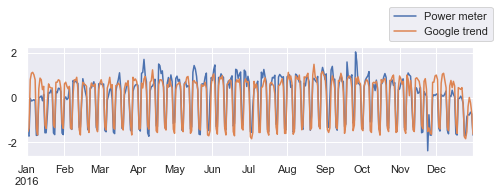

----------------------------------------------------------------------------------------------------
name meter: site4_bldg573_meter0
corr(R-squared): 0.915
topics: US_Microsoft Excel
primary use: Education


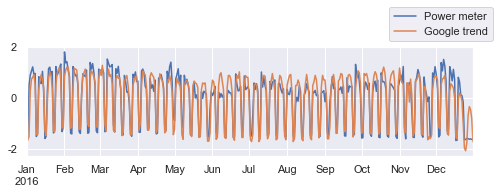

----------------------------------------------------------------------------------------------------
name meter: site6_bldg747_meter0
corr(R-squared): 0.915
topics: US_Microsoft Excel
primary use: Education


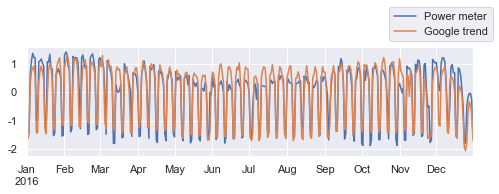

----------------------------------------------------------------------------------------------------
name meter: site4_bldg630_meter0
corr(R-squared): 0.914
topics: US_Enterprise
primary use: Education


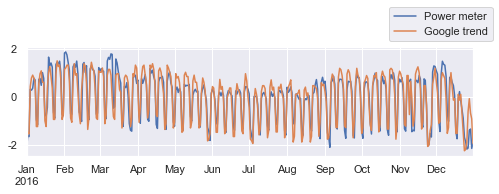

----------------------------------------------------------------------------------------------------
name meter: site4_bldg605_meter0
corr(R-squared): 0.912
topics: US_Microsoft Excel
primary use: Education


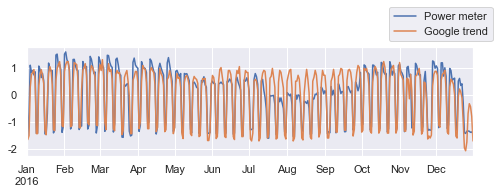

----------------------------------------------------------------------------------------------------
name meter: site4_bldg570_meter0
corr(R-squared): 0.912
topics: US_Microsoft Excel
primary use: Education


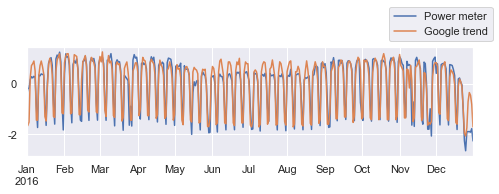

----------------------------------------------------------------------------------------------------
name meter: site4_bldg642_meter0
corr(R-squared): 0.912
topics: US_Education
primary use: Education


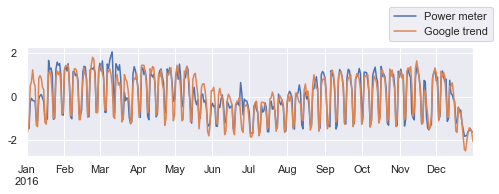

----------------------------------------------------------------------------------------------------
name meter: site2_bldg183_meter0
corr(R-squared): 0.911
topics: US_Microsoft Office
primary use: Education


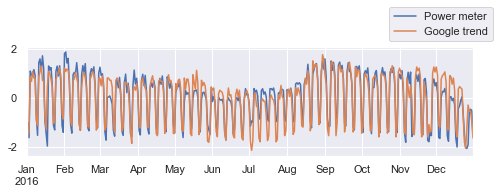

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1083_meter0
corr(R-squared): 0.911
topics: US_Enterprise
primary use: Education


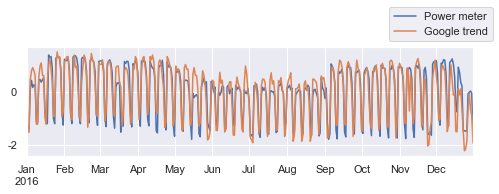

----------------------------------------------------------------------------------------------------
name meter: site4_bldg589_meter0
corr(R-squared): 0.909
topics: US_Office 365
primary use: Education


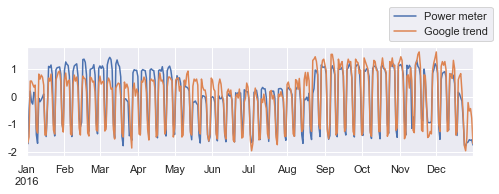

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1335_meter0
corr(R-squared): 0.908
topics: US_Education
primary use: Public services


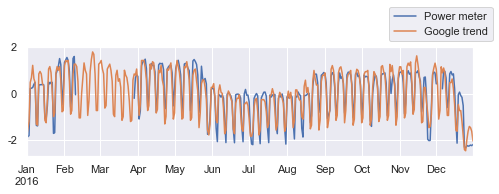

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1146_meter0
corr(R-squared): 0.908
topics: US_Enterprise
primary use: Public services


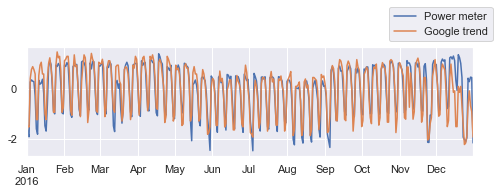

----------------------------------------------------------------------------------------------------
name meter: site14_bldg1285_meter0
corr(R-squared): 0.908
topics: US_Microsoft Excel
primary use: Healthcare


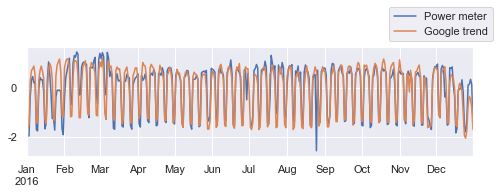

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1329_meter0
corr(R-squared): 0.907
topics: US_Microsoft Outlook
primary use: Technology/science


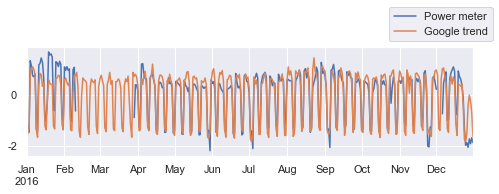

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1326_meter0
corr(R-squared): 0.906
topics: US_Microsoft Excel
primary use: Office


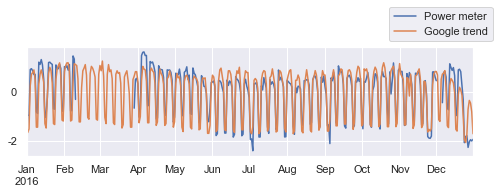

----------------------------------------------------------------------------------------------------
name meter: site4_bldg580_meter0
corr(R-squared): 0.906
topics: US_Office 365
primary use: Education


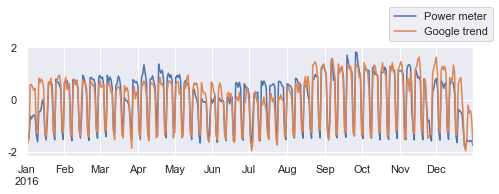

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1377_meter0
corr(R-squared): 0.906
topics: US_Microsoft Excel
primary use: Education


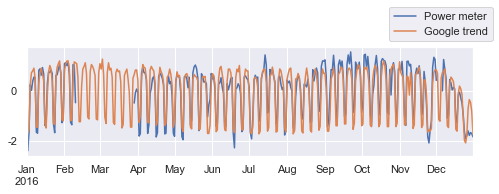

----------------------------------------------------------------------------------------------------
name meter: site13_bldg1208_meter0
corr(R-squared): 0.902
topics: US_Microsoft Outlook
primary use: Healthcare


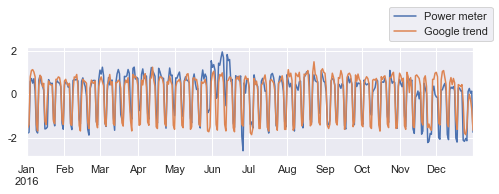

----------------------------------------------------------------------------------------------------
name meter: site4_bldg624_meter0
corr(R-squared): 0.902
topics: US_Microsoft Excel
primary use: Education


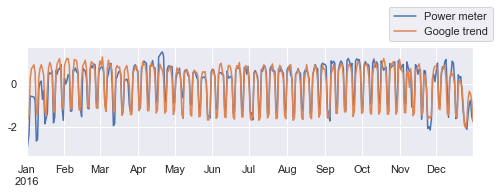

----------------------------------------------------------------------------------------------------
name meter: site15_bldg1442_meter0
corr(R-squared): 0.901
topics: US_Microsoft Outlook
primary use: Public services


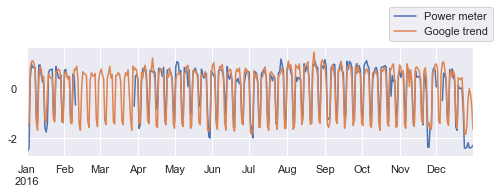

----------------------------------------------------------------------------------------------------


In [13]:
# Visualize correlations between energy and google-trends topics

df_corr_idxmax_merged = df_corr_idxmax_merged.merge(train_df_pivot.count().rename('count').reset_index(), on='merged_id')

df_corr_idxmax_merged_highCorr = df_corr_idxmax_merged[df_corr_idxmax_merged['corr']>0.9]
df_corr_idxmax_merged_highCorr = df_corr_idxmax_merged_highCorr[df_corr_idxmax_merged_highCorr['count']>8784*0.8]

for index, row in df_corr_idxmax_merged_highCorr.sort_values('corr_abs', ascending=False).iterrows():
    topics, name_meter, corr, corr_abs, count = row
    primary_use = new_building_meta_df.loc[new_building_meta_df['merged_id']==name_meter, 'primary_use'].values[0]
    
    df_plot = df_pca_merged[[name_meter]].merge(df_googleTrend_topic_pivot[[topics]], left_index=True, right_index=True)
    
    if (df_plot[name_meter].count()>366*0.8) & (name_meter.endswith('_meter0')):        
        if corr<0:
            df_plot[name_meter] = -df_plot[name_meter]
        df_plot = (df_plot-df_plot.mean())/df_plot.std()

        print('name meter: '+name_meter)
        print('corr(R-squared): '+str(round(corr,3)))
        print('topics: '+topics)    
        print('primary use: '+primary_use)   

        df_plot.columns = ['Power meter','Google trend']
        df_plot.plot(figsize=(8,2))  
        plt.legend(bbox_to_anchor=(0.8, 1.0))
        plt.show()
        print('----------------------------------------------------------------------------------------------------')

name meter: site4_bldg642_meter0
corr(R-squared): 0.912
topics: US_Education
primary use: Education


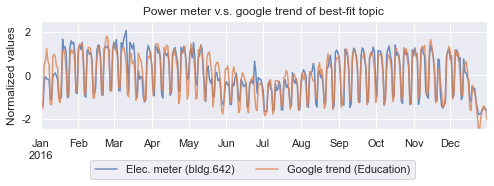

In [14]:
# Create figure

df_corr_idxmax_merged_highCorr = df_corr_idxmax_merged[df_corr_idxmax_merged['corr']>0.6]
df_corr_idxmax_merged_highCorr = df_corr_idxmax_merged_highCorr[df_corr_idxmax_merged_highCorr['count']>8784*0.8]
df_corr_idxmax_merged_highCorr = df_corr_idxmax_merged_highCorr[df_corr_idxmax_merged_highCorr['merged_id'].str.endswith('meter0')]

topics, name_meter, corr, corr_abs, count = df_corr_idxmax_merged_highCorr.loc[832]
primary_use = new_building_meta_df.loc[new_building_meta_df['merged_id']==name_meter, 'primary_use'].values[0]

df_plot = df_pca_merged[[name_meter]].merge(df_googleTrend_topic_pivot[[topics]], left_index=True, right_index=True)


df_plot = (df_plot-df_plot.mean())/df_plot.std()

print('name meter: '+name_meter)
print('corr(R-squared): '+str(round(corr,3)))
print('topics: '+topics)    
print('primary use: '+primary_use)   

df_plot.columns = ['Elec. meter (bldg.642)','Google trend (Education)']
df_plot.plot(figsize=(8,2), ylim=(-2.5,2.5),ylabel='Normalized values',title='Power meter v.s. google trend of best-fit topic',alpha=0.8)  
plt.legend(bbox_to_anchor=(0.85, -0.23), ncol=2)

plt.savefig(os.path.join(path_figures, 'How google trends relate to meter readings-1.jpg'), bbox_inches='tight', dpi=300)    

name meter: site13_bldg1142_meter0
corr(R-squared): 0.961
topics: US_Microsoft Excel
primary use: Office


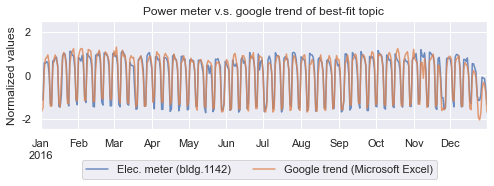

In [15]:
# Create figure

topics, name_meter, corr, corr_abs, count = df_corr_idxmax_merged_highCorr.loc[1674]
primary_use = new_building_meta_df.loc[new_building_meta_df['merged_id']==name_meter, 'primary_use'].values[0]

df_plot = df_pca_merged[[name_meter]].merge(df_googleTrend_topic_pivot[[topics]], left_index=True, right_index=True)

df_plot = (df_plot-df_plot.mean())/df_plot.std()

print('name meter: '+name_meter)
print('corr(R-squared): '+str(round(corr,3)))
print('topics: '+topics)    
print('primary use: '+primary_use)   

df_plot.columns = ['Elec. meter (bldg.1142)','Google trend (Microsoft Excel)']
df_plot.plot(figsize=(8,2), ylim=(-2.5,2.5),ylabel='Normalized values',title='Power meter v.s. google trend of best-fit topic',alpha=0.8)  
plt.legend(bbox_to_anchor=(0.90, -0.23), ncol=2)

plt.savefig(os.path.join(path_figures, 'How google trends relate to meter readings-2.jpg'), bbox_inches='tight', dpi=300)    

In [16]:
df_corr_idxmax_merged = df_corr_idxmax_merged.merge(new_building_meta_df, on='merged_id')

df_corr_idxmax_merged['meter'] = df_corr_idxmax_merged['meter'].replace({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'})
df_corr_idxmax_merged['site_id'] = 'site'+df_corr_idxmax_merged['site_id'].astype('str')

df_corr_idxmax_merged['country'] = df_corr_idxmax_merged['index'].str.split('_',expand=True)[0]
df_corr_idxmax_merged['topic'] = df_corr_idxmax_merged['index'].str.split('_',expand=True)[1]

In [17]:
df_corr_idxmax_merged.loc[df_corr_idxmax_merged['corr']<0.6, 'corr_group'] = 'Poorly correlated'
df_corr_idxmax_merged.loc[(df_corr_idxmax_merged['corr']>=0.6)&(df_corr_idxmax_merged['corr']<0.8), 'corr_group'] = 'Fairly correlated'
df_corr_idxmax_merged.loc[df_corr_idxmax_merged['corr']>0.8, 'corr_group'] = 'Highly correlated'

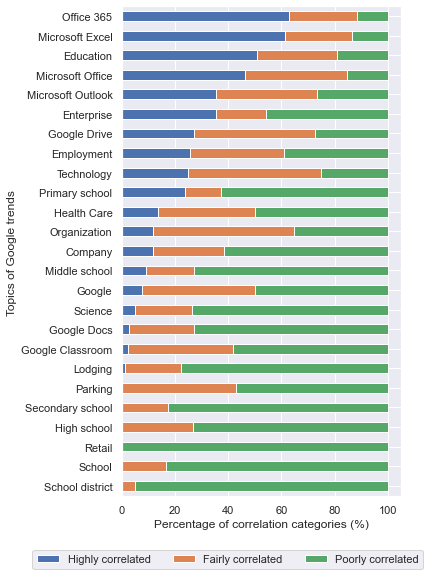

In [18]:
# Create figure

df_plot = df_corr_idxmax_merged[df_corr_idxmax_merged['meter']=='electricity'].copy()

df_plot = df_plot.pivot_table(index='topic',columns='corr_group',values='merged_id',aggfunc='count')
df_plot = df_plot[df_plot.sum(axis=1)>10]
df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100
df_plot = df_plot.sort_values('Highly correlated')
df_plot = df_plot[['Highly correlated','Fairly correlated','Poorly correlated']]
df_plot.plot(kind="barh", stacked=True, figsize=(5,9))

plt.xlabel('Percentage of correlation categories (%)')
plt.ylabel('Topics of Google trends ')

plt.legend(bbox_to_anchor=(1.10, -0.10), ncol=3)

plt.savefig(os.path.join(path_figures, 'Topics vs correlations'), bbox_inches='tight', dpi=300)    

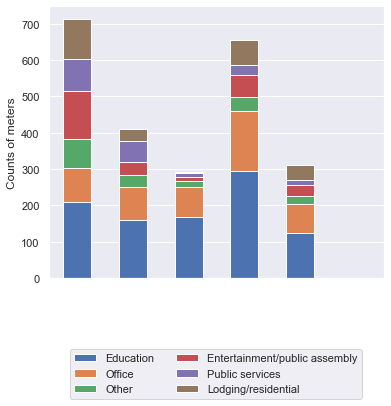

In [19]:
# Create figure

df_plot_count = df_corr_idxmax_merged.copy()
df_plot_count.loc[df_plot_count['primary_use'].isin(['Other',
                                             'Retail',
                                             'Parking',
                                             'Warehouse/storage',
                                             'Food sales and service',
                                             'Religious worship',
                                             'Healthcare',
                                             'Utility',
                                             'Technology/science',
                                             'Manufacturing/industrial',
                                             'Services']), 'primary_use'] = 'Other'
df_plot_count.loc[df_plot_count['meter']=='electricity', 'meter_type'] = 'Electricity'
df_plot_count.loc[df_plot_count['meter'].isin(['chilledwater', 'hotwater', 'steam']), 'meter_type'] = 'Chilled water, Steam, and Hot water'

df_plot_count = df_plot_count.pivot_table(index=['meter_type','corr_group'],columns='primary_use',values='building_id', aggfunc='count').fillna(0).astype('int')
df_plot_count = df_plot_count.sort_values(by=('Electricity', 'Highly correlated'), axis=1, ascending=False)
df_plot_count=df_plot_count.loc[[('Electricity', 'Poorly correlated'),
            ('Electricity', 'Fairly correlated'),
            ('Electricity', 'Highly correlated'),
            ('Chilled water, Steam, and Hot water', 'Poorly correlated'),
            ('Chilled water, Steam, and Hot water', 'Fairly correlated'),
            ('Chilled water, Steam, and Hot water', 'Highly correlated'),
]]

df_plot_count.plot.bar(stacked=True, figsize=(6,5))
plt.xlabel('')
plt.ylabel('Counts of meters')
plt.xticks([])
plt.legend(bbox_to_anchor=(0.95, -0.24), ncol=2)
plt.savefig(os.path.join(path_figures, 'Building type vs correlation'), bbox_inches='tight', dpi=300)    

In [20]:
round(df_plot_count.divide(df_plot_count.sum(axis=1),axis=0)*100,0)

primary_use                                            Education                      \
meter_type                          corr_group                                         
Electricity                         Poorly correlated                           29.0   
                                    Fairly correlated                           39.0   
                                    Highly correlated                           57.0   
Chilled water, Steam, and Hot water Poorly correlated                           45.0   
                                    Fairly correlated                           40.0   
                                    Highly correlated                          100.0   

primary_use                                            Office                         \
meter_type                          corr_group                                         
Electricity                         Poorly correlated                           13.0   
                                    Fairly correlated                           22.0   
                                    Highly correlated                           29.0   
Chilled water, Steam, and Hot water Poorly correlated                           25.0   
                                    Fairly correlated                           26.0   
                                    Highly correlated                            0.0   

primary_use                                            Other                          \
meter_type                          corr_group                                         
Electricity                         Poorly correlated                           11.0   
                                    Fairly correlated                            8.0   
                                    Highly correlated                            5.0   
Chilled water, Steam, and Hot water Poorly correlated                            5.0   
                                    Fairly correlated                            7.0   
                                    Highly correlated                            0.0   

primary_use                                            Entertainment/public assembly  \
meter_type                          corr_group                                         
Electricity                         Poorly correlated                           19.0   
                                    Fairly correlated                            9.0   
                                    Highly correlated                            4.0   
Chilled water, Steam, and Hot water Poorly correlated                            9.0   
                                    Fairly correlated                            9.0   
                                    Highly correlated                            0.0   

primary_use                                            Public services                \
meter_type                          corr_group                                         
Electricity                         Poorly correlated                           12.0   
                                    Fairly correlated                           14.0   
                                    Highly correlated                            3.0   
Chilled water, Steam, and Hot water Poorly correlated                            4.0   
                                    Fairly correlated                            4.0   
                                    Highly correlated                            0.0   

primary_use                                            Lodging/residential            
meter_type                          corr_group                                        
Electricity                         Poorly correlated                           15.0  
                                    Fairly correlated                            8.0  
                                    Highly correlated                            1.0  
Chilled water, Steam, and Hot water Poor